## Data Practioner Title and Wages

Data practioner is a generic job descriptor because we have so many different job role titles for individuals whose work activities overlap including Data Scientist, Data Engineer, Data Analyst, Business Analyst, Data Architect, etc.  

### US Bureau of Labor Statistics (BLS) Job Occupational Employment and Wage Statistics (OEWS) Data

The Occupational Employment and Wage Statistics (OEWS) program produces employment and wage estimates annually for approximately 830 occupations. These estimates are available for the nation as a whole, for individual states, and for metropolitan and nonmetropolitan areas; national occupational estimates for specific industries are also available.

We will download state level occupational data from the BLS website. It will provide details such as state, occupational titles, hourly/annual average wages, hourly/annual median wages, and total employment counts.

Our goal will be to determine how much does the average salary varies based on the role and state it resides in. 

[OEWS Data Source](https://www.bls.gov/oes/tables.htm)

In [1]:
import pandas as pd
import numpy as np
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import Raw Data

In [2]:
raw_df = pd.read_excel('state_data.xlsx').clean_names()
raw_df.head()

,area,area_title,area_type,prim_state,naics,naics_title,i_group,own_code,occ_code,occ_title,...,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly
0,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,21.07,30.82,47.51,23520,30660,43830,64110,98810,NaN,NaN
1,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,48.39,68.5,98.03,51100,72870,100640,142480,203900,NaN,NaN
2,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,79.04,106.69,#,104950,130950,164400,221910,#,NaN,NaN
3,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,51.12,78.26,#,50410,74720,106330,162780,#,NaN,NaN
4,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1031,Legislators,...,*,*,*,18270,20950,26990,41760,63900,True,NaN


## Filter For Job Roles

We will focus on occupational titles that contain the word data, as well as roles that frequently involve working with data, such as those including analyst in their title. We will avoid roles containing the term engineer, since these tend to align more closely with mechanical or electrical engineering rather than the analytical focus of our study.
After filtering the results, most roles are data-centric, with the exception of News Analysts, Reporters, and Journalists. While it can be argued that journalism and reporting are grounded in facts and data, we will exclude these roles to better maintain focus on occupations that predominantly perform data-driven analytical work rather than communication or media-oriented tasks.

In [3]:
data_roles = raw_df[raw_df['occ_title'].str.contains('data|analyst', case=False, na=False)]['occ_title'].unique()
data_roles

array(['Management Analysts',
       'Market Research Analysts and Marketing Specialists',
       'Budget Analysts', 'Credit Analysts',
       'Financial and Investment Analysts', 'Computer Systems Analysts',
       'Information Security Analysts', 'Database Administrators',
       'Database Architects',
       'Software Quality Assurance Analysts and Testers',
       'Operations Research Analysts', 'Data Scientists',
       'News Analysts, Reporters, and Journalists', 'Data Entry Keyers'],
      dtype=object)

In [4]:
data_roles = data_roles[data_roles != 'News Analysts, Reporters, and Journalists']
data_roles

array(['Management Analysts',
       'Market Research Analysts and Marketing Specialists',
       'Budget Analysts', 'Credit Analysts',
       'Financial and Investment Analysts', 'Computer Systems Analysts',
       'Information Security Analysts', 'Database Administrators',
       'Database Architects',
       'Software Quality Assurance Analysts and Testers',
       'Operations Research Analysts', 'Data Scientists',
       'Data Entry Keyers'], dtype=object)

In [5]:
data_roles_df = raw_df[raw_df['occ_title'].isin(data_roles)]
data_roles_df = data_roles_df[['area_title', 'prim_state', 'occ_title', 'tot_emp', 'h_mean', 'a_mean', 'h_median', 'a_median']].reset_index()
data_roles_df.head()

,index,area_title,prim_state,occ_title,tot_emp,h_mean,a_mean,h_median,a_median
0,46,Alabama,AL,Management Analysts,4980,53.5,111280,49.27,102480
1,51,Alabama,AL,Market Research Analysts and Marketing Special...,8780,32.13,66840,26.63,55390
2,55,Alabama,AL,Budget Analysts,940,47.93,99700,47.16,98080
3,56,Alabama,AL,Credit Analysts,310,49.66,103280,48.58,101050
4,57,Alabama,AL,Financial and Investment Analysts,2780,51.86,107880,45.51,94660


## Clean Data

We find that some data is missing for our variables, so we will replace locations of data containing non-numeric data such as **\*\*** with NaN values. 

In [6]:
mask = data_roles_df.astype(str).apply(lambda col: col.str.fullmatch(r'\*{2,}')).any(axis=1)

In [7]:
data_roles_df[mask]

,index,area_title,prim_state,occ_title,tot_emp,h_mean,a_mean,h_median,a_median
22,809,Alaska,AK,Software Quality Assurance Analysts and Testers,**,49.17,102280,49.6,103160
98,5119,Delaware,DE,Database Architects,**,72.14,150060,70.4,146430
250,13548,Maine,ME,Financial and Investment Analysts,**,45.57,94780,44.16,91840
343,18777,Montana,MT,Information Security Analysts,**,47.86,99560,41.87,87100
542,29926,South Dakota,SD,Data Entry Keyers,**,17.98,37390,18.34,38140
653,36123,Wyoming,WY,Information Security Analysts,**,58.93,122570,58.31,121290
656,36134,Wyoming,WY,Data Scientists,**,41.1,85480,46.08,95840


In [8]:
data_roles_cleaned_df = data_roles_df.replace(r'^\*+$', np.nan, regex=True)

/var/folders/c3/xzrx9_vx26s_2c8n5tm5sggm0000gn/T/ipykernel_89492/2869708294.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_roles_cleaned_df = data_roles_df.replace(r'^\*+$', np.nan, regex=True)


In [9]:
mask = data_roles_cleaned_df.astype(str).apply(lambda col: col.str.fullmatch(r'\*{2,}')).any(axis=1)
data_roles_cleaned_df[mask]

,index,area_title,prim_state,occ_title,tot_emp,h_mean,a_mean,h_median,a_median


In [10]:
data_roles_cleaned_df.dtypes

index           int64
area_title     object
prim_state     object
occ_title      object
tot_emp       float64
h_mean        float64
a_mean        float64
h_median      float64
a_median      float64
dtype: object

## Descriptive Stats

In [11]:
data_roles_cleaned_df

,index,area_title,prim_state,occ_title,tot_emp,h_mean,a_mean,h_median,a_median
0,46,Alabama,AL,Management Analysts,4980.0,53.50,111280.0,49.27,102480.0
1,51,Alabama,AL,Market Research Analysts and Marketing Special...,8780.0,32.13,66840.0,26.63,55390.0
2,55,Alabama,AL,Budget Analysts,940.0,47.93,99700.0,47.16,98080.0
3,56,Alabama,AL,Credit Analysts,310.0,49.66,103280.0,48.58,101050.0
4,57,Alabama,AL,Financial and Investment Analysts,2780.0,51.86,107880.0,45.51,94660.0
...,...,...,...,...,...,...,...,...,...
675,37444,Virgin Islands,VI,Market Research Analysts and Marketing Special...,120.0,23.94,49790.0,24.10,50130.0
676,37447,Virgin Islands,VI,Budget Analysts,70.0,31.11,64720.0,29.83,62050.0
677,37448,Virgin Islands,VI,Financial and Investment Analysts,40.0,40.22,83660.0,33.65,69990.0
678,37450,Virgin Islands,VI,Computer Systems Analysts,50.0,31.50,65530.0,27.24,56650.0


In [12]:
total_emp_df = data_roles_cleaned_df.groupby('occ_title', as_index=False).agg({'tot_emp':'sum'}) 
total_emp_df

,occ_title,tot_emp
0,Budget Analysts,47600.0
1,Computer Systems Analysts,499030.0
2,Credit Analysts,68100.0
3,Data Entry Keyers,137980.0
4,Data Scientists,234350.0
5,Database Administrators,73330.0
6,Database Architects,64430.0
7,Financial and Investment Analysts,342060.0
8,Information Security Analysts,179590.0
9,Management Analysts,897610.0


### Total Employment By Occupational Role

When examining total employment counts by occupational role, we can see that the top three roles (Management Analysts, Market Research Analysts and Marketing Specialists, and Computer Systems Analysts) account for the majority of employment across the United States.

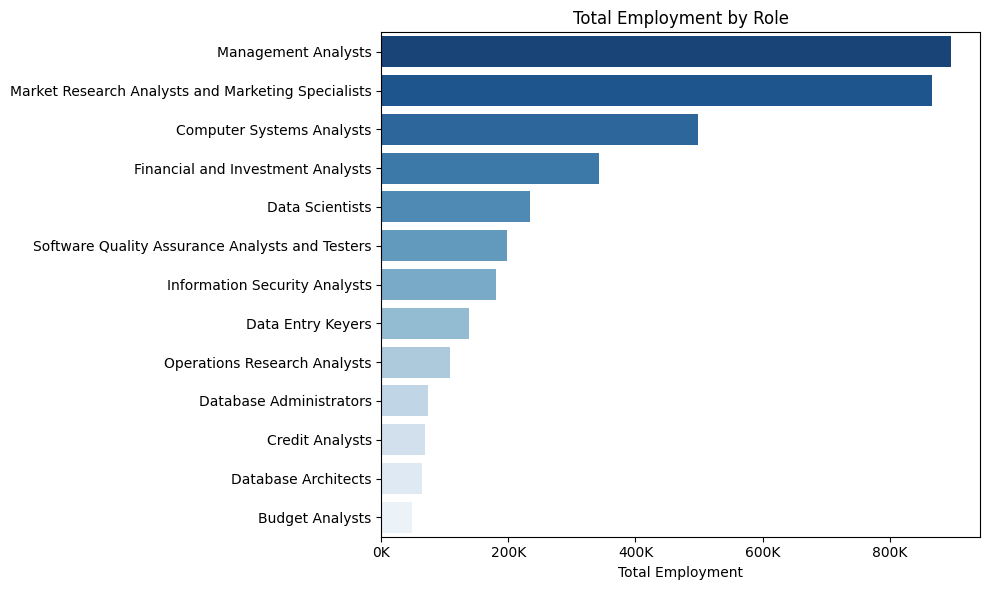

In [13]:
import matplotlib.ticker as mticker

# Sort by total employment for better readability
total_emp_df = total_emp_df.sort_values('tot_emp', ascending=False)

# Create figure
plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_emp_df,
    y='occ_title',
    x='tot_emp',
    hue='occ_title',
    palette='Blues_r'
)

# Format x-axis labels as K (thousands)
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Titles and labels
plt.title('Total Employment by Role')
plt.xlabel('Total Employment')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [14]:
total_state_df = data_roles_cleaned_df.groupby('area_title', as_index=False).agg({'tot_emp':'sum'})    # 'area_title', 'prim_state',
total_state_df.head()

,area_title,tot_emp
0,Alabama,35350.0
1,Alaska,2680.0
2,Arizona,74360.0
3,Arkansas,19890.0
4,California,474250.0


### Total Employment By State

When we examine the total employment counts by state, we can see that a clear majority of data roles are concentrated in **California**, while **Texas** and **New York** rank a distant second and third. This aligns with expectations, as Silicon Valley, a major hub of the technology industry and a driver of data-related roles, is located within California.

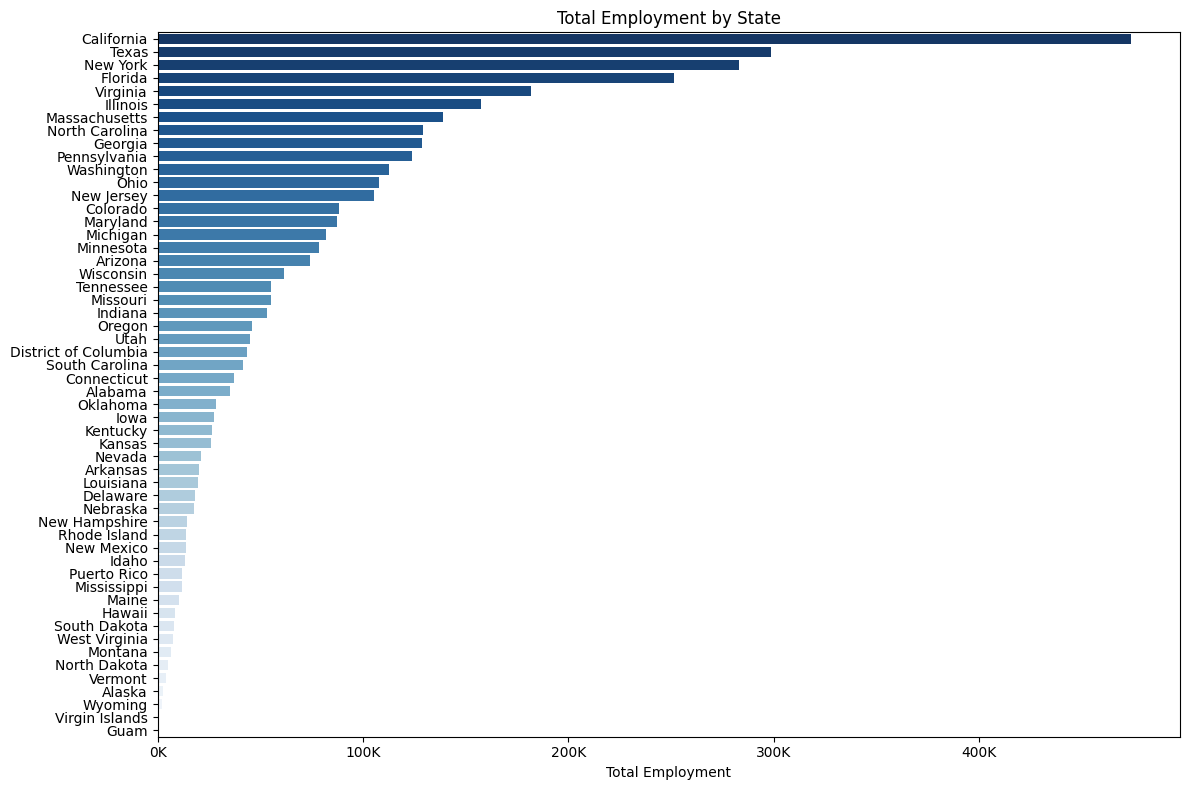

In [15]:
# Sort by total employment for better readability
total_state_df = total_state_df.sort_values('tot_emp', ascending=False)

# Create figure
plt.figure(figsize=(12, 8))
sns.barplot(
    data=total_state_df,
    y='area_title',
    x='tot_emp',
    hue='area_title',
    palette='Blues_r'
)

# Format x-axis labels as K (thousands)
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Titles and labels
plt.title('Total Employment by State')
plt.xlabel('Total Employment')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Average Annual Wage by Role and State

We will use a heatmap to visualize the landscape of average annual wages across roles and states. We can immediately see that **Data Entry Keyers** have the lowest average wage across the entire United States. Looking further, **Database Architects** appear to have higher average salaries across multiple states, as their category frequently shows up among the top. However, since averages can be influenced by a few highly paid individuals, we should be cautious and verify this trend by examining the median values.

In [16]:
import plotly.express as px
import pandas as pd

# --- Define list of valid U.S. state abbreviations ---
us_states = [
    'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY',
    'LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND',
    'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'
]

# --- Filter only U.S. states ---
filtered_df = data_roles_cleaned_df[data_roles_cleaned_df['prim_state'].isin(us_states)].copy()

# --- Create alphabetic state order ---
state_order = sorted(us_states)

# --- Pivot table for mean wages ---
pivot = (
    filtered_df
      .pivot_table(index='occ_title', columns='prim_state', values='a_mean')
      .sort_index()  # alphabetize roles
)

# --- Align to alphabetic state order ---
pivot = pivot[state_order]

# --- Plot heatmap ---
fig_heat = px.imshow(
    pivot,
    aspect='auto',
    color_continuous_scale='RdYlGn',
    origin='lower'
)

fig_heat.update_layout(
    title="Average annual wage by role and state",
    xaxis_title="State",
    yaxis_title="",
    yaxis_autorange='reversed',
    coloraxis_colorbar=dict(title="Avg. Wage ($)")
)

fig_heat.show()


## Median Annual Wage by Role and State

Once again we see **Data Entry Keyers** having the lowest median pay across all states and roles. We are also able to clearly see that **Database Architects** are indeed the highest paid, in general, across most states in the US. 

In [17]:
# --- Pivot table for median wages ---
pivot = (
    filtered_df
      .pivot_table(index='occ_title', columns='prim_state', values='a_median')
      .sort_index()  # alphabetize roles
)

# --- Align to alphabetic state order ---
pivot = pivot[state_order]

# --- Plot heatmap ---
fig_heat = px.imshow(
    pivot,
    aspect='auto',
    color_continuous_scale='RdYlGn',
    origin='lower'
)

fig_heat.update_layout(
    title="Median annual wage by role and state",
    xaxis_title="State",
    yaxis_title="",
    yaxis_autorange='reversed',
    coloraxis_colorbar=dict(title="Median Wage ($)")
)

fig_heat.show()

## Occupational Role within Each State

To gain a better understanding of how each role compares across states, we can select a specific role of interest and observe how it performs geographically. Using **Data Entry Keyers** as an example, we see that the West Coast, including Washington and California, offers higher wages than the Southeast region of the United States. When examining **Database Architects**, the disparity becomes even greater, with California averaging around $163K, while Wyoming falls much lower at approximately $69K.

In [18]:
# --- Choropleth with role dropdown ---
# Build one frame per role for animation OR use dropdown filtering
roles = data_roles_cleaned_df['occ_title'].sort_values().unique().tolist()

fig_map = px.choropleth(
    data_roles_cleaned_df[data_roles_cleaned_df['occ_title'] == roles[0]],
    locations='prim_state',
    locationmode='USA-states',
    color='a_mean',
    color_continuous_scale='RdYlGn',
    scope='usa',
    hover_name='area_title',
    hover_data={'prim_state': True, 'a_mean': ':.0f'},
    title=f"Average annual wage by state"
)

# Add dropdown to switch role
dropdown_buttons = []
for r in roles:
    filtered = data_roles_cleaned_df[data_roles_cleaned_df['occ_title'] == r]
    dropdown_buttons.append({
        'label': r,
        'method': 'restyle',
        'args': [{'z':[filtered['a_mean']],
                  'locations':[filtered['prim_state']],
                  'hovertext':[filtered['area_title']]},
                 [0]]  # trace index 0
    })

fig_map.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'x': 0.02, 'y': 1.05,
        'xanchor': 'left', 'yanchor': 'top',
        'showactive': True
    }],
    coloraxis_colorbar=dict(title="Avg wage ($)")
)

fig_map.show()

## Weighted Annual Average Wage by State

Lastly, we will examine how the average annual wage compares across states. Since we are given total employment counts, our sample sizes vary significantly between states. To account for this and make a fairer comparison, we will use a weighted average. When we look at these weighted averages, we can see that states such as **Washington, California, and New York** have some of the highest wages across all the roles analyzed.

In conclusion, living in these states generally allows individuals to earn some of the highest potential wages, regardless of their specific role. However, as noted earlier, roles with titles such as **Database Architect** tend to provide the highest average wages overall. It is important to note that while these states offer strong compensation, they are also considered high cost-of-living regions, meaning wages often reflect those economic disparities compared to states that pay significantly less.

In [19]:
def safe_weighted_avg(values, weights):
    # Drop NaNs from both values and weights before computing
    mask = ~np.isnan(values) & ~np.isnan(weights)
    if mask.sum() == 0:
        return np.nan
    return np.average(values[mask], weights=weights[mask])

weighted_by_state = (
    data_roles_cleaned_df
      .groupby("prim_state", as_index=False)
      .apply(lambda g: pd.Series({
          "weighted_a_mean": safe_weighted_avg(g["a_mean"].values, g["tot_emp"].values),
          "weighted_h_mean": safe_weighted_avg(g["h_mean"].values, g["tot_emp"].values),
          "total_emp": np.nansum(g["tot_emp"].values),
          "occupations_count": g["occ_title"].nunique()
      }))
      .reset_index(drop=True)
)

weighted_by_state.head()

/var/folders/c3/xzrx9_vx26s_2c8n5tm5sggm0000gn/T/ipykernel_89492/2457295063.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,prim_state,weighted_a_mean,weighted_h_mean,total_emp,occupations_count
0,AK,91715.895522,44.094590,2680.0,13.0
1,AL,95901.612447,46.106399,35350.0,13.0
2,AR,76863.956762,36.951855,19890.0,12.0
3,AZ,98357.002421,47.286322,74360.0,13.0
4,CA,121724.295203,58.521977,474250.0,13.0


In [20]:
# Optional: add full state names for hover
abbr_to_name = {
    "AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado",
    "CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho",
    "IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana",
    "ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi",
    "MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey",
    "NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma",
    "OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota",
    "TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington",
    "WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"
}
weighted_by_state["state_name"] = weighted_by_state["prim_state"].map(abbr_to_name)

# ---------- 3) Plotly choropleth ----------
fig = px.choropleth(
    weighted_by_state,
    locations="prim_state",
    locationmode="USA-states",
    color="weighted_a_mean",
    color_continuous_scale="RdYlGn",
    scope="usa",
    labels={"weighted_a_mean": "Weighted annual mean ($)"},
)

# Better hover text
fig.update_traces(
    customdata=np.stack([weighted_by_state["state_name"], weighted_by_state["total_emp"]], axis=1),
    hovertemplate="<b>%{customdata[0]}</b><br>"
                  "Weighted Avg: $%{z:,.0f}<br>"
                  "Total employment: %{customdata[1]:,}"
                  "<extra></extra>"
)

# Titles and formatting
fig.update_layout(
    title="Weighted Annual Average Wage by State",
    coloraxis_colorbar_title="Weighted Avg. ($)"
)

fig.show()